In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

df = pd.read_csv("/Users/lambardaar/Desktop/STUDY/python/CA/Bank_Churn.csv")
df["Balance"] = df["Balance"].replace(0, df["Balance"].mean())
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1


FEATURE SELECTION

In [3]:

c_feature = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "EstimatedSalary",
    "HasCrCard", "IsActiveMember"
]

X_cluster = df[c_feature]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)



FINDING BEST K

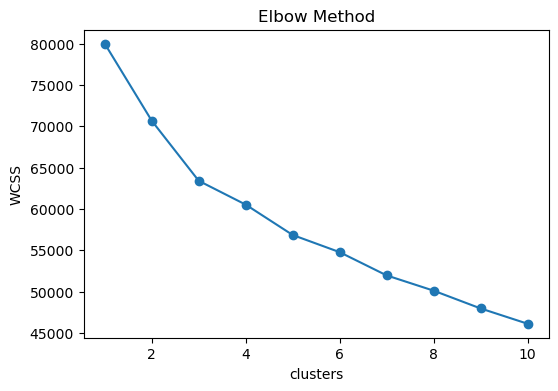

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


PREDECTION AT BEST K

In [5]:

kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster
0,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1,2
1,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0,1
2,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1,0
3,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0,1
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0,2


CLUSTER VISUALIZATION

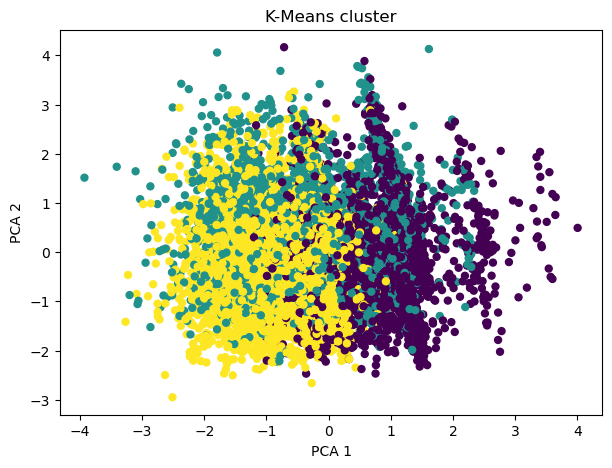

In [6]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df["Cluster"], s=25)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-Means cluster")
plt.show()

ABOUT CLUSTER

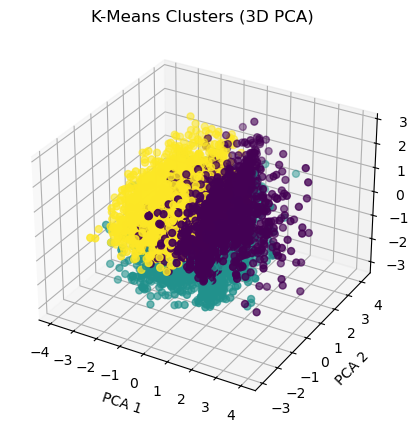

In [7]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_3d = pca.fit_transform(X_scaled)

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:,0], pca_3d[:,1], pca_3d[:,2],
           c=df["Cluster"], s=25)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title("K-Means Clusters (3D PCA)")
plt.show()


In [8]:
cluster_profile = df.groupby("Cluster")[c_feature].mean()
cluster_profile

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember
Cluster,,,,,,,,
0,651.485222,38.079197,5.108465,95396.594842,2.092396,100274.989659,0.991105,0.527690
1,651.236788,39.081675,4.899794,104622.345336,1.505148,100965.962773,0.000000,0.523679
2,649.030269,39.607887,5.011663,112241.518218,1.006387,99202.789317,1.000000,0.495973


In [9]:
def predict_cluster(credit_score, age, tenure, balance,
                    num_products, estimated_salary, has_card, is_active):
    
    new_data = pd.DataFrame([[
        credit_score, age, tenure, balance,
        num_products, estimated_salary, has_card, is_active
    ]], columns=c_feature)

    u_scaled = scaler.transform(new_data)

    cluster = kmeans.predict(u_scaled)[0]

    print(f"\nThe new datapoint belongs to Cluster: {cluster}")
    return cluster




In [10]:
predict_cluster(650, 28, 2, 5000, 1, 30000, 1, 1)



The new datapoint belongs to Cluster: 0


0

In [11]:
predict_cluster(651, 39, 5, 104000, 1, 101000, 0, 1)



The new datapoint belongs to Cluster: 1


1

In [12]:
predict_cluster(670, 38, 4, 60000, 1, 70000, 1, 1)



The new datapoint belongs to Cluster: 2


2

In [13]:
# joblib.dump(kmeans, "kmeans.pkl")
# joblib.dump(scaler, "kmeans_scaler.pkl")
